In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 정보 이론: Information theory

정보이론은 이산적 신호에 존재하는 정보의 양을 측정하는 응용수학의 한 갈래이다.

정보이론의 핵심 아이디어는 잘 일어나지 않는 사건(unlikely event)은 자주 발생하는 사건보다 정보량이 많다는 것이다.

- 자주 발생하는 사건은 낮은 정보량을 가진다. 발생이 보장된 사건은 그 내용에 상관없이 전혀 정보가 없다는 것을 뜻한다.
- 덜 자주 발생하는 사건은 더 높은 정보량을 가진다.
- 독립사건(independent event)은 추가적인 정보량(additive information)을 가진다. 예컨대 동전을 던져 앞면이 두 번 나오는 사건에 대한 정보량은 동전을 던져 앞면이 한번 나오는 정보량의 두 배이다.

---

# Entropy

정보의 양을 나타내는 함수 $h(x)$는 확률 함수 $p(x)$의 음의 로그 값으로 볼 수 있다.

- 정보의 값은 0 이상이어야 하므로 0~1 사이의 확률값에 로그를 붙이는 경우 앞에 음수가 붙어야 한다.
- 빈번하게 일어나는 사건보다 드물게 일어나는 사건이 높은 정보량을 가져야 한다.
- 로그의 밑수가 어떤 값인지는 상관 없고, 조건에 따라 적절한 것을 선택한다. (보통 2를 많이 사용하고, 머신러닝에서는 자연상수를 사용한다.)

위 세가지 조건을 만족하는 함수는 발생 가능한 사건이나 메세지의 확률분포에 음의 로그를 취한 수식이다. 확률변수 $X$의 값이 $x$인 사건의 정보량은 아래와 같다.

$$ h(x) = - \log P(x) $$



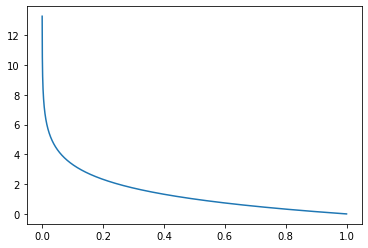

In [2]:
X = np.linspace(0.0001, 1, 100000)
Y = np.log2(X)
plt.plot(X, -Y)
plt.show()

확률에서 예시로 많이 사용되는 동전과 주사위로 비유해 보자.

동전을 던져 앞면이 나오는 사건과, 주사위를 던져 6이 나오는 사건에 대한 정보량을 구해보자. 동전의 경우 확률은 1/2, 주사위의 경우 확률은 1/6가 되므로 두 정보량은 아래와 같다.

In [3]:
P_coin = 1/2
P_dice = 1/6

(-np.log2(P_coin), -np.log2(P_dice))

(1.0, 2.584962500721156)

주사위에서 6이 나오는 사건은 동전이 나오는 사건보다 낮은 확률로 발생하기 때문에 더 높은 정보량을 갖는다.

또한 서로 연관되어 있지 않은 두 사건 x와 y를 고려해 보자. 이 경우 x와 y가 함께 일어났을 때 얻는 정보량은 각자의 사건이 따로 일어났을 때 얻는 정보량의 합이 된다. 따라서 $ h(x, y) = h(x) + h(y) $가 된다. 이는 서로 독립적인 사건들은 통계적으로도 독립이라는 사실을 확인하면 $p(x, y) = p(x)p(y)$ 이므로, $h(x)$는 $p(x)$의 로그에 해당한다는 것을 알 수 있다.



모든 사건을 고려했을때, 모든 정보량의 기댓값은 아래와 같다.

$$ H[x] = - \sum_x{p(x) \log_2 p(x)} $$

이 식은 매우 중요한데 이를 엔트로피(entropy)라고 정의하고, 평균 정보량을 의미한다.

동전을 예로 들어보면, 각 사건이 일어날 확률은 1/2이고, 그에 따른 정보량은 -log(1/2) = 1이다. 따라서 $ {1\over2} {(1 + 1)} = 1 $이 된다. 똑같은 동전을 N번 던지는 사건들을 모으면, 각 동전을 던지는 사건들은 서로 독립이므로 엔트로피는 각 확률변수의 엔트로피 합과 같게 되어 N이 될 것이다.

다음의 예제를 추가적으로 살펴보자.

똑같이 8개의 값이 있고, 각 변수가 발생할 확률이 같다고 가정해 보자. 이때의 엔트로피는 다음과 같을 것이다.
$$ H[x] = -8 \times {1 \over 8} \log_2 {1 \over 8} = 3 $$

조금 다른 변수에 대해 고려해보자. 변수의 개수는 같으나 각각의 확률이 다음처럼 다양하게 주어진다 ($ {1 \over 2}, {1 \over 4}, {1 \over 8}, {1 \over 16}, {1 \over 64}, {1 \over 64}, {1 \over 64}, {1 \over 64} $). 이 경우 엔트로피는 다음과 같다.
$$ H[x] = - {1 \over 2} \log_2 {1 \over 2} - {1 \over 4} \log_2 {1 \over 4} - {1 \over 8} \log_2 {1 \over 8} - {1 \over 16} \log_2 {1 \over 16} - {4 \over 64} \log_2 {1 \over 64} = 2 $$


이를 통해 사건의 분포가 비균일한 엔트로피가 균일한 분포의 엔트로피보다 작은 값을 갖는 것을 알 수 있다.

아래는 두개의 사건이 있고, 하나의 사건에 대한 확률이 0에서 1까지 변하면서 생기는 엔트로피의 변화 그래프이다.

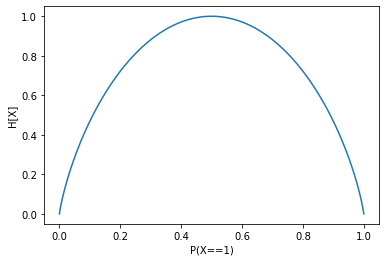

In [4]:
X = np.linspace(0.00001, 0.99999, 1000)
Y = -X * np.log2(X) - (1-X) * np.log2(1-X)
plt.plot(X, Y)
plt.xlabel("P(X==1)")
plt.ylabel("H[X]")
plt.show()

확률이 1/2일때 엔트로피가 가장 높은데, 이는 두 사건이 발생한다고 할 때, 두 사건의 발생확률이 같으면 어떤 사건이 발생할 지 예측하기 가장 어렵기 때문이라고도 생각할 수 있다.

---

## 책으로 돌아가서..

책의 201p에 나와있는 날씨 예제를 생각해보자. 날씨에 대한 정보가 8가지가 있고, 각 날씨들이 발생할 확률이 동일하게 1/8이라고 하자. 이 때 엔트로피는 $ 8 \times {{1 \over 8} (-\log_2 {1\over8})} = 3$이다. 총 8가지 정보를 3bit로 표현할 수 있다. (0, 1, 10, 11, 100, 101, 110, 111) 이에 따른 평균 코드 길이는 다음과 같다.

In [5]:
Code = 1 * 2 * (1/8) + 2 * 2 * (1/8) + 3 * 4 * (1/8)

Code

2.25


이와 다르게 대부분의 날(2/3)이 맑음이고, 나머지 7개의 날씨의 확률이 균일하다고 할 때의 엔트로피는 다음과 같다.

In [6]:
sunny = 2/3

else_weather = (1 - sunny) / 7

Entropy = -1 * sunny * np.log(sunny) - 7 * else_weather * np.log(else_weather)

Entropy

1.2851508846465842

이 때, 맑은 날을 0이라고 하고, 나머지 7개의 날씨를 각각 (1001, 1010, 1011, 1100, 1101, 1110, 1111)으로 표시하면, 맑음은 1bit, 나머지 날씨는 4bit를 가진다. 이에 따른 평균 코드 길이는 다음과 같다. 

In [7]:
sunny = 2/3

else_weather = (1 - sunny) / 7

Code = 1 * sunny + 4 * 7 * else_weather

Code

2.0

즉, 균일한 확률을 가지고 있었던 첫번째 경우에 비해 균일하지 않은 사건들의 엔트로피가 더 낮고, 전달하는 비트의 양도 낮게 만들 수 있다.

엔트로피가 높다는 것은 불확실성의 정도가 높다는 것을 의미하기도 한다.